In [79]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

I found 1 face(s) in this photograph.
(82, 167, 211, 38)


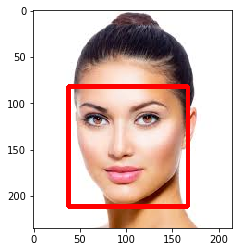

In [6]:
img = cv2.imread("face.jpg")

face_locations = face_recognition.face_locations(img)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    print(face_location)
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

In [7]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [41]:
frame = cv2.imread("face.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

    

Number of faces detected: 1
[(37, 79) (162, 203)]


In [42]:
print(rects[0])
shape = predictor(gray, rects[0])
print(shape)
shape = face_utils.shape_to_np(shape)
print(shape)

[(37, 79) (162, 203)]
[[ 46 118]
 [ 47 131]
 [ 50 144]
 [ 54 158]
 [ 59 171]
 [ 66 184]
 [ 74 197]
 [ 84 207]
 [ 97 209]
 [112 207]
 [127 199]
 [140 190]
 [151 178]
 [157 164]
 [160 148]
 [162 131]
 [163 115]
 [ 50 103]
 [ 57  99]
 [ 65 101]
 [ 72 104]
 [ 80 107]
 [104 106]
 [114 101]
 [124  98]
 [134  98]
 [144 101]
 [ 93 120]
 [ 92 130]
 [ 92 141]
 [ 91 152]
 [ 85 158]
 [ 89 160]
 [ 93 161]
 [ 98 159]
 [103 157]
 [ 59 119]
 [ 65 115]
 [ 74 115]
 [ 80 122]
 [ 72 124]
 [ 64 123]
 [111 121]
 [117 115]
 [126 114]
 [132 118]
 [127 122]
 [118 123]
 [ 76 172]
 [ 83 169]
 [ 90 167]
 [ 95 169]
 [100 167]
 [109 169]
 [118 172]
 [110 181]
 [101 186]
 [ 95 186]
 [ 89 185]
 [ 82 180]
 [ 80 174]
 [ 90 174]
 [ 95 175]
 [101 175]
 [115 173]
 [101 175]
 [ 95 176]
 [ 89 175]]


<img src=facial_landmarks_68markup-768x619.jpg width=300>

Detection 0: Left: 37 Top: 79 Right: 162 Bottom: 203


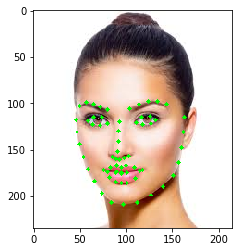

In [43]:
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
imshow('', frame)

[121.83333333 118.83333333]


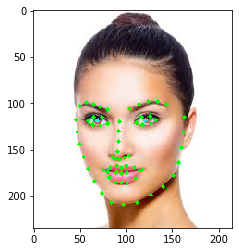

In [44]:
# 36~31

eyel = np.mean(shape[36:42], axis=0)
eyer = np.mean(shape[42:48], axis=0)
cv2.circle(frame, (int(eyel[0]), int(eyel[1])), 2, (255, 255, 0), -1)
cv2.circle(frame, (int(eyer[0]), int(eyer[1])), 2, (255, 255, 0), -1)

imshow("", frame)      

In [53]:
img = face_recognition.load_image_file("face.jpg")
face_encoding = face_recognition.face_encodings(img)
#print(face_encoding)
print(face_encoding[0].shape)

(128,)


In [61]:
files = os.listdir("known")   
    
known_face_encodings = []
known_face_names = []

for filename in files:
            name, ext = os.path.splitext(filename)
            if ext == '.jpg':
                known_face_names.append(name)
                pathname = os.path.join("known", filename)
                img = face_recognition.load_image_file(pathname)
                face_encoding = face_recognition.face_encodings(img)[0]
                known_face_encodings.append(face_encoding) 


In [63]:
print(known_face_names)
print(known_face_encodings[1])

['download (1)', 'download', 'images (1)', 'images', 'joy', 'lena']
[-1.56090528e-01  1.55272558e-01  5.74190542e-02 -3.19189355e-02
 -7.87879974e-02  1.34482328e-02  1.73839964e-02 -1.84090614e-01
  1.25658661e-01 -1.31308079e-01  2.28729025e-01 -2.27183662e-02
 -2.92023242e-01 -1.46069840e-01  4.55431715e-02  1.96130648e-01
 -9.82938558e-02 -1.49466425e-01 -1.91071600e-01 -1.40226647e-01
  1.34106744e-02  5.05321398e-02 -1.74108967e-02 -1.18055530e-02
 -1.38503850e-01 -2.57383585e-01 -5.74151017e-02 -8.57022032e-02
 -2.49307584e-02 -1.15608744e-01  8.61181393e-02  2.70245951e-02
 -1.87387258e-01 -6.31892979e-02 -3.89760062e-02  3.88664082e-02
 -8.83499309e-02 -5.14074266e-02  9.85020250e-02  9.90783796e-03
 -1.55147880e-01  1.86270289e-02 -3.10125984e-02  2.52253711e-01
  2.31507912e-01 -1.17084850e-02  3.05810869e-02 -1.26504973e-01
  1.09531648e-01 -2.72929132e-01 -7.22417235e-02  9.90075171e-02
  7.33518973e-05  7.61077777e-02  7.80330077e-02 -1.11818478e-01
  2.27724053e-02  1.27

In [62]:
test = face_recognition.load_image_file("facetest.jpg")


face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
     distances = face_recognition.face_distance(known_face_encodings, face_encoding)
     print(distances)
     min_value = min(distances)  

     name = "Unknown"
     if min_value < 0.6:
                    index = np.argmin(distances)
                    name = known_face_names[index]
print(name)              

[0.40076061 0.44785689 0.41582803 0.42029407 0.95401924 0.92574444]
download (1)


In [88]:
imagePaths = list(paths.list_images("known"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        
import pickle
data = {"encodings": knownEncodings, "names": knownNames}
f = open("known.bin", "wb")
f.write(pickle.dumps(data))
f.close()        

known   -   known\joy.jpg
known   -   known\lena.jpg
obama   -   known\obama\download (1).jpg
obama   -   known\obama\download (2).jpg
obama   -   known\obama\download (3).jpg
obama   -   known\obama\download.jpg
obama   -   known\obama\images (1).jpg
obama   -   known\obama\images (2).jpg
obama   -   known\obama\images (3).jpg
obama   -   known\obama\images (4).jpg
obama   -   known\obama\images.jpg
song   -   known\song\download (4).jpg
song   -   known\song\download.jpg
song   -   known\song\images (1).jpg
song   -   known\song\images (2).jpg
song   -   known\song\images (3).jpg
song   -   known\song\images.jpg
trump   -   known\trump\download (1).jpg
trump   -   known\trump\download.jpg
trump   -   known\trump\images (1).jpg
trump   -   known\trump\images.jpg


In [94]:
#print(data["encodings"])
#print(data["names"])

print(data["names"][0])
print(data["encodings"][0])

known
[-0.19577354  0.05737101  0.08239753 -0.10308313 -0.18811402 -0.05900588
 -0.10964389 -0.10897715  0.25637457 -0.19032931  0.0906534   0.00965153
 -0.22526872 -0.01936293 -0.09319458  0.14953139 -0.163698   -0.21719883
 -0.05472282 -0.05076824  0.05715754  0.02172098  0.04858763  0.0867006
 -0.11211456 -0.38629881 -0.07212236  0.00119765 -0.05134015 -0.14004448
  0.0674165   0.08271103 -0.21389028 -0.00374109 -0.05177135  0.19961858
  0.04487129 -0.09529112  0.10345527 -0.00151412 -0.2929166  -0.11144763
  0.0167275   0.24967419  0.19001055  0.01488714 -0.02843294 -0.12206628
  0.12998022 -0.30553192  0.06672019  0.19750558 -0.05607519 -0.02902635
  0.12832431 -0.1248419   0.04463046  0.13650051 -0.15113394  0.03923365
  0.04916123 -0.10608451 -0.02331531 -0.15686873  0.20386884  0.14891481
 -0.0968481  -0.16821435  0.2143009  -0.20988967 -0.10923995  0.04610657
 -0.08095508 -0.18330672 -0.35445809 -0.08340678  0.40377018  0.18064895
 -0.14975707  0.10074151 -0.10055861 -0.037288

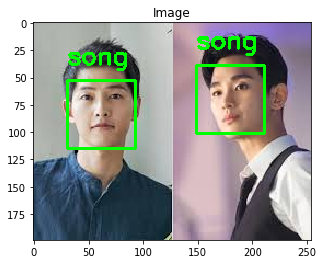

In [104]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("songtest.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

In [103]:
encoding=encodings[0]
matches = face_recognition.compare_faces(data["encodings"], encoding)
print(matches)

matchedIdxs = [i for (i, b) in enumerate(matches) if b]
print(matchedIdxs)

for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
            
name = data["names"][11]
print(data["names"])
print(name)

counts["song"] = 2
counts["obama"] = 1


a = {}
#a["hello"] 
print(a.get("hello", 0))
#a["hello"] = 10


[False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]
[11, 12, 13, 14, 15, 16]
['known', 'known', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'song', 'song', 'song', 'song', 'song', 'song', 'trump', 'trump', 'trump', 'trump']
song


KeyError: 'hello'

In [106]:
a = [1,2,3,4]
b = ["a", "b", "c", "d"]

for i in range(len(a)) :
    print(a[i], b[i])
    
for i in zip(a, b) :
    print(i[0], i[1]) 


1 a
2 b
3 c
4 d
1 a
2 b
3 c
4 d


In [108]:
feature = np.array(data["encodings"])
print(feature.shape)

(21, 128)


In [112]:
import pandas as pd
c = pd.Categorical(data["names"])
print(c)

pd.factorize

[known, known, obama, obama, obama, ..., song, trump, trump, trump, trump]
Length: 21
Categories (4, object): [known, obama, song, trump]
